# Анализ данных и машинное обучение в среде разработки Anaconda

Целью данной курсовой работы будет:

* Получение навыков работы в среде Anaconda.
* Анализ данных с использованием языка Python и библиотек pandas и numpy. Визуализация данных с использованием языка Python и библиотек matplotlib и seaborn.
* Практическое применения алгоритмов машинного обучения с использованием языка Python и библиотеки sklearn.

Данная работа в первую очередь ориентирована на практическое применение инструментов, поэтому многие теоретические аспекты некоторых вопросов (например, алгоритмов машинного обучения) будут опущены. Результат работы представлен в виде .pdf отчёта из интерактивной среды Anaconda, содержащий все необходимые выкладки и блоки программного кода.

## Часть 1. Анализ данных

Для начала, пару слов про среду разработки, в которой я работал. Anaconda — интерактивная среда разработки, созданная в первую очередь для нужд анализа данных и машинного обучения. Anaconda бесплатна и по умолчанию поставляется с ядром Python и необходимыми тематическими библиотеками для него. Помимо этого, в Anaconda можно установить другие ядра, и, соответственно, добавить поддержку других языков программирования. Например, также популярного в анализе данных языка R.

Anaconda работает с документами в формате .ipynb. Эти документы называются ноутбуками. Средство для работы с ноутбуками в Anaconda называется jupiter (недавно оно носило название ipython). Ноутбук представляет из себя рабочее пространство, состоящее из ячеек. Эти ячейки бывают разных типов: в них могут находится исходных код, текст (Markdown разметка), графики, изображения или формулы (LaTeX). Текст, который вы сейчас читатете помещён в ячейку типа "текст".


Исходный код, размещённый в блоках, выполняется поблочно. Контекст (переменные, функции и т.д.) из вышележащих блоков доступен в нижележащих.

### Постановка задачи

В машинном обучении и анализе данных важно чётко определить цели и задачи.

Установим цели для блока анализа данных:

* Понять структуру данных.
* Проанализировать статистические особенности данных.
* Визуализировать данные и постараться найти закономерности, которые могут помочь нам с задачей машинного обучения.

Задача поставлена. Начнём с подключения необходимых в этой части работы библиотек. Для этого используется команда import в языке Python. Обратите внимание, что некоторые библиотеки подключены с использованием короткого псевдонима (с помощью ключевого слова as).

In [1]:
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### Обзор датасета

В данной работе я буду оперировать данными пассажиров печально известного Титаника, затонувшего 15 апреля 1912 года в северной части Атлантического океана. 14 апреля во время первого рейса самый большой на тот момент океанский лайнер с 2208 людьми на борту по касательной столкнулся с айсбергом и получил серьёзные повреждения обшивки корпуса. Спустя 2 часа 40 минут — в 2:20 15 апреля полностью ушёл под воду. Катастрофа унесла жизни, по разным данным, от 1495 до 1635 человек.

Данные о 891 человеке, находившимся на борту, хранятся в .csv файле. Считаем его с помощью функции read_csv, которую предоставляет библиотека Pandas. Результат чтения сохранится в переменную data, тип которой — DataFrame. Этот тип данных используется в Pandas для того, чтобы удобно оперировать с табличными данными.

In [2]:
data = pd.read_csv('data.csv', index_col='PassengerId')

С помощью метода head нашего объекта data выведем первые 5 строчек таблицы. Это необходимо для того, чтобы посмотреть на структуру данных.

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В анализе данных и машинном обучении данные почти всегда представляются в виде таблиц. В таких таблицах строки — это объекты, а столбцы — признаки объектов. Например, первая строка описывает отдельного человека, мужчину 22 лет, которого зовут Braund, Mr. Owen Harris.

Важно отметить, что какой-то один признак является целевым. Наш алгоритм машинного обучения (мы будем заниматься задачей бинарной классификации), который мы будем строить в следующей части, будет пытаться правильно предсказать этот признак для каждого объекта на основе других признаков этого объекта. В нашей задаче мы будем предсказывать значение признака "Survived", т.е. будем пытаться предсказать выжил человек или нет. Но подробнее об этом мы будем говорить в следующей части.

В нашем случае все признаки интерпретируемые и конкретно означают какуюто особенность объекта. Но так бывает не всегда. Давайте разберёмся, что означает каждый признак:

- survival — выжил человек, или нет (1, или 0)
- pclass — класс пассажира (1 = первый; 2 = второй; 3 = третий)
- name — Имя
- sex — Пол
- age — Возраст
- sibsp — Количество братьев и сестер, или супруг на борту
- parch — Количество родителей или детей на борту
- ticket — Номер билета
- fare — Плата за проезд
- cabin — Номер каюты
- embarked — Порт посадки (C = Cherbourg; Q = Queenstown; S = Southampton)

Ещё один небольшой шаг перед тем как погружаться в работу с самими данными. С помощью метода info нашего DataFrame можно получить сводную информацию у строках нашей таблицы.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Согласно выводу этого метода можно заключить, что в наших данных всего 891 объект (пассажир). Так же мы видим информацию о каждой колонке (признаке): название признака, количество непустых значений и тип данных признака.

Тут мы и столкнулись с первой проблемой — не у всех объектов заполнены все признаки. Так, например, в нашей таблице у 177 объектов не указан пол, у 687 объектов не указана каюта и у двух объектов отсутствует порт посадки.

Ещё в конце вывода можно заметить количество используемой памяти. В нашем случае датасет маленький — он занимает всего 83.6 KB.

### Анализ данных

Теперь, когда мы полностью разбирались в структуре наших данных, настало время проанализировать их.

Начнём с некоторых статистик. Используя метод describe нашей переменной с данными data можно вывести сводную таблицу статистик. Среди них будет среднее значение (mean), стандартное отклонение (std), минимум (min), максимум (max), а также 25, 50, и 75 процентили.

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Стоит обратить внимание, что данный метод работает лишь с целочисленными и вещественными столбцами (оно и понятно — для остальных данных невозможно посчитать данные статистики)

Итак, проанализируем вывод и заметим несколько наиболее интересных особенностей:

- Средний возраст пассажиров — 30 лет. Самому маленькому пассажиру не было и года, а самому взрослому было 80 лет.
- Максимальное количество братьев и сестер, или супруг на борту — 8, а максимальное количество родителей или детей на борту — 6.
- Максимальная плата за билет — 512 долларов, минимальная — 0 (т.е. кому-то билет достался даром).

Мы узнали много статистических особенностей данных, однако не все признаки удобно анализировать в таком виде. Например, по данному выводу понять распределение некоторых категориальных признаков (Survived и Pclass).

Давайте проанализируем их отдельно. Для этого воспользуемся методом value_counts у отдельных столбцов нашего DataFrame. Обратите внимание, что доступ к столбцам (технически, столбцы являются объектами типа Series) осуществляется с помощью квадратных скобок и указания в них имени столбца.

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

В выводе этого метода мы видим распредение значений данный колонки. По ним видно, что 342 пассажиров выжили, 549 — погибли.

Также поступим и с классом.

In [7]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Мы видим, что 491 пассажиров плыло бюджетным третим классов, 216 — втором классом и лишь 184 пассажира плыло первым классом.

### Визуализация данных

Выше были продемонстрированы различные способы анализа данных, но часто для большего понимания данных необходимо представить данные графически. Это задача называется задачей визуализации.

Есть набор стандартных приемов визуализации, которые нужно попробовать, когда вы начинаете работу с набором данных; к ним относятся построение гистограмм признаков (histogram, density estimation), л статистик, оценка зависимости целевого признака от остальных (boxplot, scatterplot, violinplot), визуализация пар признаков (как правило, scatterplot). Однако, в данной работе мы оперируем простым датасетом, поэтому множества методов визуализации данных, которые часто применяются на практике, мы не коснёмся.

Начнём с построения гистограмм. Гистограмма — эффективный способ визуализации распределения значений наших признаков. Мы можем использовать метод hist нашего объекта data для того, чтобы построить гистограммы всех вещественных и целочисленных признаков наших данных. В функцию мы передаём размер гистограмм и количество "столбиков", на которые будут разбиты данные.

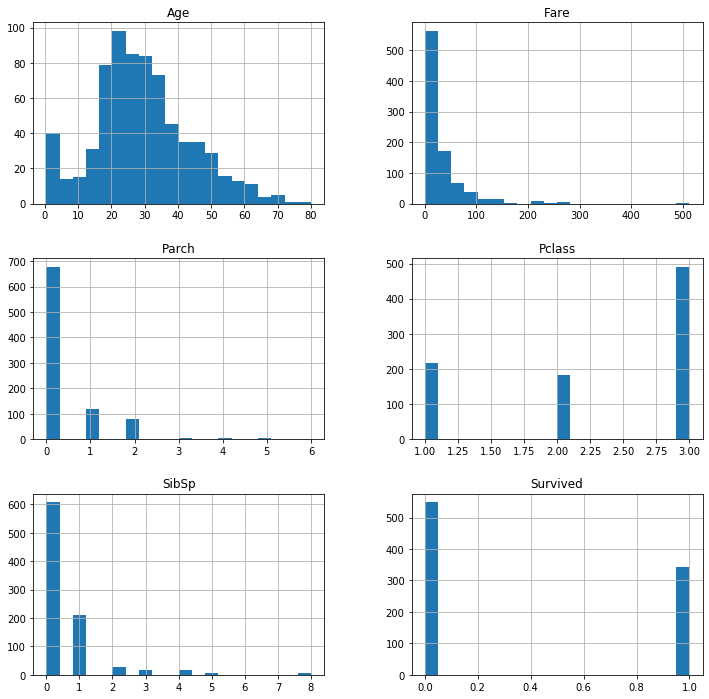

In [8]:
hists = data.hist(figsize=(12, 12), bins=20)

Как видно, это очень удобный и эффективный способ проанализировать наши данные и возможно, приметить какие­то особенности. Метод hist также можно вызвать и у объекта класса Series (т.е. отдельного столбца наших данных). Часто для визуализации данных в анализе данных и машинном обучении используется одна очень полезная библиотека — matplotlib. Необходимый нам модуль pyplot этой библиотеки был подключён нами в самом начале к коротким именем plt. Воспользуемся им.

In [9]:
# Тут будет код

Как можно заметить, код получился громоздким. Однако, pyplot предоставляет множество параметров для полной настройки графического представления данных. Этот модуль редко применяют для постоения простых гистограмм — с помощью него обычно строят сложные графики.

Визуализировать распределения значений и оценивать прочие особенности исходных данных часто бывает полезно, но для нас анализ данных важен с точки зрения понимания нашей задачи (предсказание выживания пассажиров), поэтому нам необходимо исследовать зависимость целевого признака с другими признаками в данных.

В этом деле нам пригодится ещё одна полезнейшая библиотека для визуализации данных — seaborn. Она также как и matplotlib (более того, seaborn совместима с matplotlib и часто использует классы последней) часто используется в анализе данных. Конечно, можно пользоваться самой matplotlib, но мне для некоторых целей привычнее и удобнее использовать seaborn.

Начнём с зависимости возраста и выживаемости пассажира.

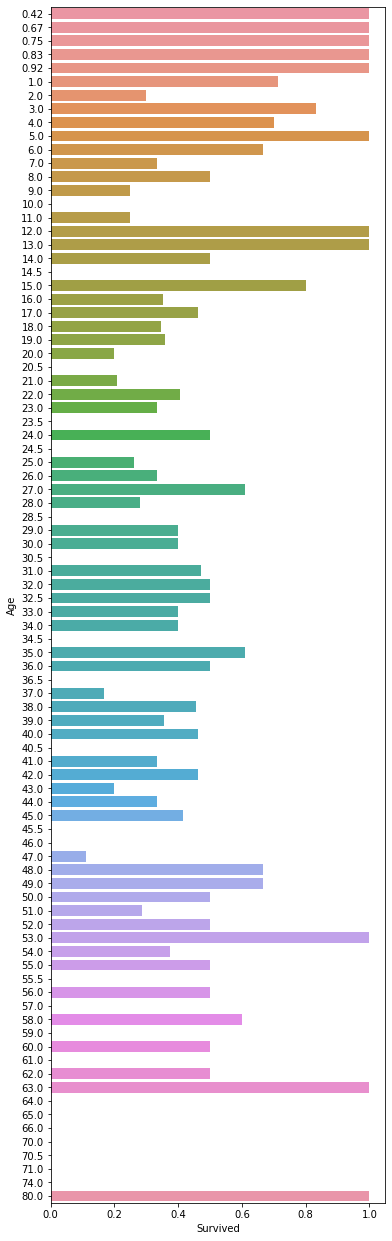

In [10]:
fig, axis1 = plt.subplots(1, 1, figsize=(6, 22))
average_age = data[['Age', 'Survived']].groupby(['Age'],as_index=False).mean()
ax = seaborn.barplot(x='Survived', y='Age', data=average_age, orient='h')

По этим данным можно утверждать, что дети и люди в возрасте в большинстве своём выживали, а среди людей среднего возраста количество погибших намного больше. Это правда, но не стоит забывать, что наше распределение возрастов (его можно посмотреть на гистограмме выше) описывается нормальным, т.е. детей и пожилых людей на корабле было намного меньше, чем людей среднего возраста.

Теперь посмотрим на зависимость пола и выживаемости пассажира.

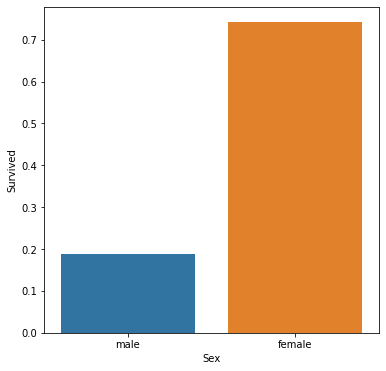

In [11]:
fig, axis1 = plt.subplots(1, 1, figsize=(6, 6))
sex_and_survived = data[['Sex', 'Survived']]
ax = seaborn.barplot(x='Sex', y='Survived', data=sex_and_survived, ci=None)

На полученном графике видно, насколько разительно отличается выживаемость у мужчин и женщин. Она настолько сильная, что если бы мы на вопрос "Предскажите, какие пассажиры выжили?" ответили бы "Только женщины", то точность бы составила приблизительно 75%, а это уже очень неплохой результат для задачи предсказания.

Теперь также оценим класс билета и выживаемость.

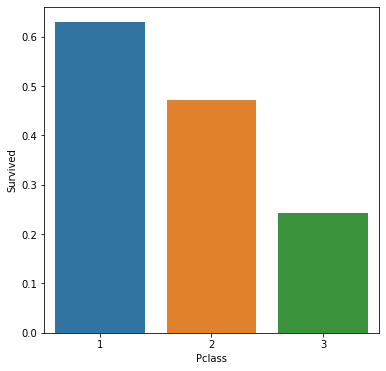

In [12]:
fig, axis1 = plt.subplots(1, 1, figsize=(6, 6))
class_and_survived = data[['Pclass', 'Survived']]
ax = seaborn.barplot(x='Pclass', y='Survived', data=class_and_survived, ci=None)

И опять мы видим наглядный результат: выживаемость пассажира сильно зависила от его класса. Другими словами, чем премиальнее был класс пассажира, тем у него было больше шансов выжить.

Подведём итоги исследования зависимости целевого признака с другими признаками в данных:
- У детей и людей в возрасте было больше шансов выжить.
- Выживаемость пассажира критически зависила от пола. Многие женщины выжили, большинство мужчин погибли.
- Чем лучше класс пассажира, тем у него было больше шансов выжить.


Опираясь хотя бы на эти три факта можно довольно эффективно решать задачу предсказания выживания — достаточно просто "прогонять" каждого пассажира по этим трём критериям. Однако, таких простых случаев в практическом применении анализа данных и машинного обучения почти не бывает, поэтому для подобных задач приходится применять более сложные инструменты и методы, о которых мы поговорим во второй части.

Интересный факт, что наше исследование наглядно доказывает историческое неписаное правило, согласно которому задача по спасению жизней женщин и детей имеет приоритет ("Сначала женщины и дети").

In [13]:
data['Sex'] = data['Sex'].map({'male' : 1, 'female': 0})

Иногда в задачах анализа данных бывает полезным построить pairplot график. Если в датасете немного признаков, то с помощью такого графика можно наглядно посмотреть их попарные распределения. С помощью этого графика так же можно определить коррелирующие признаки и признаки, которые хорошо разделяются.

In [ ]:
seaborn.pairplot(data, hue='Survived', diag_kind='kde')

Однако, в нашем случае ничего полезного из данного графика извлечь не удалось — никаких ранее неизвестных закономерностей мы тут не обнаружили.

Подводя итог блока визуализации данных, хочется сказать, что используя методы DataFrame, а также средства мощных библиотек matplotlib (а именно модуля pyplot) и seaborn можно очень эффективно производить анализ данных, находить в данных особенности, подмечать статистические закономерности.

## Часть 2. Машинное обучение

### Подготовка данных

Будем готовить данные. Удалим ненужные для нас признаки.

In [ ]:
data = data.drop(['Ticket', 'Cabin'], axis=1)

Снова с помощью метода info выведем информацию о нашем датасете и вспомним, что у некоторых объектов значение некоторых признаков отсутствует.

In [ ]:
data.info()

### Машинное обучение

Мы проделали большой путь. Сначала мы анализировали данные, а потом готовили их к этапу машинного обучения. И этот этап настал. Но для начала нам необходимо познакомится с базовыми определениями, терминами и задачами машинного обучения.

Машинное обучение — обширный подраздел искусственного интеллекта, изучающий методы построения алгоритмов, способных обучаться. Говоря простыми словами, машинное обучение это набор алгоритмов, которые с помощью набора исходных данных выдают какой-либо результат.

Набор данных — это конечное множество прецедентов (объектов, ситуаций), по каждому из которых собрана (измерена) некоторая информация. Совокупность всех имеющихся описаний прецедентов называется обучающей выборкой. Наиболее распространённым способом описания прецедентов является признаковое описание.

В нашем случае предеценты (объекты) — это пассажиры корабля. Их признаковое описание это и есть данные, которыми мы оперировали ранее.

Различают несколько типов задач машинного обучения. Но основные из них это обучение с учителем (supervised learning) и обучение без учителя (unsupervised learning).

Обучение с учителем (supervised learning) — наиболее распространённый случай. Каждый прецедент представляет собой пару "объект, ответ". Требуется найти функциональную зависимость ответов от описаний объектов и построить алгоритм, принимающий на входе описание объекта и выдающий на выходе ответ.

В нашем случае под ответом понимается значение признака Survived (его обычно называют целевым признаком), а под объектом — значения остальных признаков. Соотвественно, наша задача построить такой алгоритм, который бы на основе признакого описания пассажиров высчитывал бы для них значение колонки Survived.

В обучении с учителем есть множество различных задач, но нас интересует задача классификации. Задача классификации (classification) отличается тем, что множество допустимых ответов конечно (в нашем случае возможных ответа два — 1 если пассажир выжил, 0 — если погиб).

### Постановка задачи

In [ ]:
# Формулы

Обратите внимание на то, что мы ищем функцию приближающую исходную функцию, по которой была получена наша выборка. Почему это так? Почему мы не ищем саму исходную функцию? Во­ первых, дело в том, что исходная функция почти всегда очень сложна. Например, наша функция, которая определяет зависимость характеристик пассажира и факт того, выжил он или нет, очевидно, очень сложная. Однако, дело не только в этом. По правде говоря, мы в силах рассчитать любую зависимость, другое дело, сыграет ли это нам на пользу. Представим, что мы нашли ту сложную функцию, которая со 100% точностью решает задачу по нашей выборке.

Теперь мы проверяем наш алгоритм на отложенном количестве объектов, которые не учавствовали в обучении, и видим, что результат получается сильно далёк от 100%. Почему это так?

Всё дело в том, что в погоне за точностью мы забыли, что наша задача не подогнаться под обучающую выборку, а найти некоторый "закон природы". Говорят, что мы получили переобученный алгоритм ­ в процессе обучения он настолько подогнался под обучающую выборку, что на любом объекте из неё мы получаем 100% точности, но стоит нам проверить наш алгоритм на отложенных объектах, как точность очень сильно упадёт.

Имеет место и обратный процесс — недообученный алгоритм. В этом случае мы, наоборот, очень плохо нашли функцию, приближающую исходную, и имеем плохой результат даже на обучающей выборке.

Наша цель — найти алгоритм, который будет "находиться между" недообученным и переобученным алгоритмами. Найти такой алгоритм, который будет с какой-то ошибкой (это неизбежно, т.к. на практике мы не никогда сможен построить идеальный непереобученный алгоритм) приближать исходную функцию, найдёт "закон природы" и будет одновременно хорошо работать для обучающей выборки и для выборки, на котором он будет тестироваться.

Качество алгоритма машинного обучения измеряется при помощи метрик. Набор метрик обычно зависит от типа алгоритма. Но мы не будем вдаваться в детали этой темы. В этой работе в качестве метрики будет использоваться доля пральный ответов (интуитивно понятно, что это значит, с какой точностью мы правильно предсказывает результат).

Как уже было сказано выше, качество работы алгоритма проверяют на объектах, которые не участвовали в обучении. Такие объекты составляют тестовую выборку. Есть несколько способов формирования тестовой выборки. Самые популярные среди них — отложенная выборка и кросс-валидация.

Смысл отложенной выборки заключается в том, что мы просто оставляем какую-то часть объектов для теста и убираем их из обучающей выборки. Этот способ очень прост и имеет много недостатков. Например, может получится так, что в отложенной выборке окажутся все объекты одного класса, а в тестовой — другого. Или обучающая и тестовая выборка окажутся несбалансированы по каким-либо факторам.

Мы же в этой работе будем использовать метод кросс-валидации. Он предсавляет собой усовершенствованный метод отложенной выборки. Суть в том, что мы разбиваем всю нашу выборку на некоторое количество фолдов (блоков). На практите обычно используется разбиение на 5 фолдов. Далее, мы делаем следующее: запускаем цикл обучения столько раз, на сколько фолдов мы делили выборку. В каждой итерации цикла один из фолдов является тестовой выборкой, остальные — обучающей. В итоге мы получается столько значений точностей алгоритма, на сколько фолдов мы разбирали исходную выборку. Итоговая точность получается их усреднением.

Приступим к практике. Разделим нашу выборку на вектор с целевым признаком и датафрейм с остальными признаками.

In [ ]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [ ]:
X.head()

In [ ]:
print(y[:5])

Теперь у нас есть множество объектов X и множество ответов y. Далее настроим нашу кросс-валидацию. Мы будем пользоваться генератором разбиения и инструментом для кросс-валидации из библиотеки sklearn (с помощью которой мы так же будем строить все наши алгоритмы машинного обучения). Импортируем их.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

Генератор разбиений KFold задает набор разбиений на обучение и валидацию. Число блоков в кросс­валидации определяется параметром n_folds. Обратите внимание, что порядок следования объектов в выборке может быть неслучайным, это может привести к смещенности кросс­ валидационной оценки. Чтобы устранить такой эффект, объекты выборки случайно перемешивают перед разбиением на блоки. Для перемешивания достаточно передать генератору KFold параметр shuffle=True.

Вычисляется качество на всех разбиениях можно при помощи функции cross_val_score. В качестве параметра estimator передается классификатор (наш алгоритм), в качестве параметра cv — генератор разбиений с предыдущего шага. С помощью параметра scoring можно задавать меру качества, по умолчанию в задачах классификации используется доля верных ответов (accuracy). Результатом является массив, значения которого нужно усреднить.

Теперь создадим наше разбиение. Его мы будем использовать для всех алгоритмов.

In [ ]:
# Создадим наше разбиение

### Алгоритмы нашинного обучения

Настал самый важный этап работы. Мы будем применять к нашим данным различные алгоритмы машинного обучения и искать оптимальный для нашей задачи. Как упоминалось в начале, данная работа не ставит перед собой цель освещения теоретический части принципов работы алгоритмов машинного обучения. Перед каждым алгоритмов лишь вкратце будет описан примерный принцип работы, без каких­либо математических выкладок.

Всего мы будем применять к нашим данным 5 типов алгоритмов: решающее дерево, случайный лес, градиентный бустинг над деревьями, метод опорных векторов и логистическая регрессия. Давайте подключим необходимые алгоритмы из библиотеки sklearn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### Решающее дерево

Первым алгоритмом у нас будет решающее дерево. Решающее дерево относится к логическим видам алгоритмов машинного обучения.

Решающие деревья воспроизводят логические схемы, позволяющие получить окончательное решение о классификации объекта с помощью ответов на иерархически организованную систему вопросов. Причём вопрос, задаваемый на последующем иерархическом уровне, зависит от ответа, полученного на предыдущем уровне. Подобные логические модели издавна используются в ботанике, зоологии, минералогии, медицине и других областях.

Решающее дерево очень простой и крайне интерпретируемый алгоритм машинного обучения. Давайте посмотрим на пример простого решающего дерево, построенного на необработаных данных из первой части работы.

In [ ]:
# Картинка

Работа алгоритма заключается в пропуске каждого объекта вниз по дереву до тех пор, пока он не достигнет метки класса. Существует множество способов постоения деревьем, большинство из которых жадные. Самые популярные из них это, пожалуй, алгоритмы ID3 и C5.0. Также существуют методы борьбы с переобучением деревьев, например, стрижка деревьев.

Давайте построим наше решающее дерево. Метод DecisionTreeClassifier вернёт объект — наш алгоритм. Далее, в функцию cross_val_score мы передадим наш алгоритм-классификатор, множество объектов, множество ответов и наше разбиение.